# 1) Чтение данных

In [109]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


# Загрузка данных
df = pd.read_csv('C:/Users/shemy/Downloads/master2.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,4.Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,2.Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,4.Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,1.G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,3.Boomers


# 2) Обработка данных

In [110]:
# Удалим строки с пропущенными значениями
df = df.dropna()

# Выберем числовые признаки для кластеризации
features = df[['suicides_no', 'population', 'year', 'gdp_per_capita ($)', 'suicides/100k pop', 'gdp_for_year ($)']]

# Нормализуем данные
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3) KMeans

In [111]:
# Применим KMeans с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# Посмотрим на метки кластеров
df['kmeans_cluster'] = kmeans_labels

# 4) DBSCAN

In [112]:
# Применим DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# Добавим метки DBSCAN в датафрейм
df['dbscan_cluster'] = dbscan_labels

# 5) Agglomerative Clustering

In [113]:
# Применим агломеративную кластеризацию с 3 кластерами
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(scaled_features)

# Добавим метки агломеративной кластеризации в датафрейм
df['agg_cluster'] = agg_labels

# 6) Сравнение

In [114]:
# Для целей сравнения сделаем категориальные метки
true_labels = df['generation'].astype('category').cat.codes

# Сравним результаты кластеризации с истинными метками
kmeans_score = adjusted_rand_score(true_labels, df['kmeans_cluster'])
dbscan_score = adjusted_rand_score(true_labels, df['dbscan_cluster'])
agg_score = adjusted_rand_score(true_labels, df['agg_cluster'])

print(f"KMeans ARI: {kmeans_score}")
print(f"DBSCAN ARI: {dbscan_score}")
print(f"Agglomerative ARI: {agg_score}")

KMeans ARI: 0.05874296554189404
DBSCAN ARI: 0.040506667133270106
Agglomerative ARI: 0.041627336453682676


# 7) С применением PCA

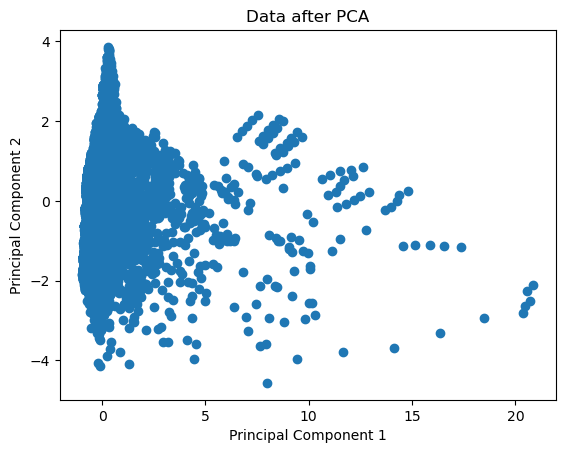

In [156]:
from sklearn.decomposition import PCA

# Признаки для кластеризации
features = df[['suicides_no', 'population', 'year', 'gdp_per_capita ($)', 'suicides/100k pop', 'gdp_for_year ($)']]

# Стандартизируем данные (нормализация)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Применяем PCA для уменьшения размерности (например, до 2D для визуализации)
pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_features)

# Визуализируем данные после PCA
plt.scatter(pca_features[:, 0], pca_features[:, 1])
plt.title("Data after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [157]:
# Определяем оптимальное количество кластеров (например, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_features)

# Сравниваем результаты с истинными метками
kmeans_ari = adjusted_rand_score(df['generation'].astype('category').cat.codes, kmeans_labels)
print(f"KMeans ARI: {kmeans_ari}")

KMeans ARI: 0.05852900596401296


In [158]:
# Применим DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_features)

# Сравниваем результаты с истинными метками
db_ari = adjusted_rand_score(df['generation'].astype('category').cat.codes, dbscan_labels)
print(f"DBSCAN ARI: {db_ari}")

DBSCAN ARI: 0.03720291246844796


In [159]:
# Применение агломеративной кластеризации с 3 кластерами
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(pca_features)

# Сравниваем результаты с истинными метками
agg_ari = adjusted_rand_score(df['generation'].astype('category').cat.codes, agg_labels)
print(f"Agglomerative ARI: {agg_ari}")

Agglomerative ARI: 0.03279481403675181


# Вывод

Значения API всех методов находятся в пределах 0 и 0.1, что означает, что сходство между кластеризацией, выполненной этими методами, и истинными метками очень низкое. Но метод KMeans работает немного лучше. Возможные причины низких значений могут быть из-за сложности структуры данных или в разнице в распределении данных и меток(если истинные метки (например, страны) сильно различаются по количеству объектов в каждом классе (например, в одних странах много данных, а в других — очень мало))